In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/Colab Notebooks/MNIST"

mnist_test.csv	mnist_train.csv


Importing the required modules, libraries for getting a definite a ***neural network.***


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torchvision import transforms, models
from torch.autograd import Variable
from torch import nn, optim
import torch.nn.functional as F


Reading the CSV files 

In [5]:
#Reading the CSV files 
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MNIST/mnist_train.csv", dtype = np.float32, header = None)
final_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MNIST/mnist_test.csv", dtype = np.float32, header = None)

In [6]:
train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


So now I am renaming the first column from 0 to label to increase its 
accessibility for seperating it into labels and features. 


In [8]:
train.rename(columns = {0:'label'}, inplace = True)

In [9]:
train

,label,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


So now, Ill try to briefly explain the concept of Labels and features. 

*   **Labels** can be thought of like a name-tag for a given object/item. They are basically telling us what the object is.
*   **Features** of the given Label are some random organized data that corresponds to the Label. 
 
We are trying to seperate the ***MNIST training dataset*** into its specific labels and features. 



In [11]:
label_array = train.label.values
features_array = train.loc[:, train.columns != 'label'].values/255 # We do by 255 to convert all the values in the "features_array" to a number less than or equal to 1
print(features_array.shape)

(60000, 784)


Now we use the **train_test_split** function to be able to get data to test and train (split the data). I have stored it in the given below variable names.

In [31]:
train_ka_features, test_ka_features, train_ka_label, test_ka_label = train_test_split(features_array, label_array, test_size = 0.2, random_state = 42)

Imagine my need to convert numpy arrays to tensors as for increasing the accessibility of **Loading** the data into the neural network. I convert numpy arrays into Tensors. 

In [18]:
train_features_tensor = torch.from_numpy(train_ka_features)
test_features_tensor = torch.from_numpy(test_ka_features)
test_label_tensor = torch.from_numpy(test_ka_label).type(torch.LongTensor)
train_label_tensor = torch.from_numpy(train_ka_label).type(torch.LongTensor)

So now, our data has been split and successfully converted into a tensor. What we need now is to define a batch-size in which the data will be *Loaded* into the DataLoader to use it in the further neural network. If the batch-size is defined too large, then the neural network will:


1.  Have a bad generalization
2.  Or even might get stuck in a local minima (back prop)



In [19]:
batch_size = 256
# Pytorch train and test sets
train = torch.utils.data.TensorDataset(train_features_tensor, train_label_tensor)
test = torch.utils.data.TensorDataset(test_features_tensor,test_label_tensor)

#Loading the data.

train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = True)



This part of the code has been copied from a site since it is just displaying the numpy (features part) array into like what image its trying to form. 

(784,)


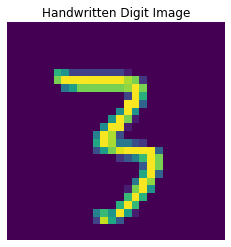

In [20]:
def visualize_image(data, index, pred=False, val=0):
    '''This funtion can be used to visualize the images'''
    print(data[index].shape)
    plt.imshow(data[index].reshape(28,28))
    plt.axis("off")
    plt.title("Handwritten Digit Image")
    plt.show()
visualize_image(features_array, 44)



*  So now, here starts the actual part of learning **HOW** neural network get trained and are able to predict numbers (mnist).
*  So in the code written below, I have created Hidden Layers in the network to be able to **Guess** what the number is. Think of the different Layers like each of them is trying to predict something or the other of the image and then passing it onto the next layer.

*   After the certain number has reached the last layer, we apply softmax to give a **"probability"** to each of the possible answers (0-9).
*  The passing onto the next layer comes in the forward function defined. **(relu)** here is a operator which sets the value of the output in a specified range. 



 

In [28]:
class NeuralNetwork(nn.Module):
  def __init__(self) -> None :
    super().__init__()

    #Here we are going to create out hidden layers
    self.hl1 = nn.Linear(28*28, 512)
    self.hl2 = nn.Linear(512,256)
    self.hl3 = nn.Linear(256,128)
    self.hl4 = nn.Linear(128,64)
    self.hl5 = nn.Linear(64,10)

    self.dropout = nn.Dropout(p = 0.2)

    self.log_softmax = F.log_softmax 
    

  def forward(self,x):
    x = self.dropout(F.relu(self.hl1(x)))
    x = self.dropout(F.relu(self.hl2(x)))
    x = self.dropout(F.relu(self.hl3(x)))
    x = self.dropout(F.relu(self.hl4(x)))
    x = self.log_softmax(self.hl5(x), dim=1)
    return x 
          

**model** will now be used to carry out the process going on through the hidden layers till the final layer. 
Loss : This is practically the most important part in training the neural network, because based on the value of the output of criterion...
We are going to backpropagate and change the values of the weight assigned accordingly. 
We use the optimizer and keep the learning rate as 0.0010. This will be tweaked later to show why optimizers are important. 

In [29]:
model = NeuralNetwork() 
criterion = nn.NLLLoss() 
optimizer = optim.Adam(model.parameters(), lr = 0.0010)

epochs = 25
steps = 0 
kitna_baad = 50

train_losses = []
test_losses = []

for e in range(epochs):
  running_loss = 0
  for images, labels in train_loader:
    steps = steps + 1
    optimizer.zero_grad() 

    log_ps = model(images)
    loss = criterion(log_ps, labels)

    loss.backward()
    optimizer.step() #using the optimizer

    running_loss  = running_loss + loss.item()

    if steps % kitna_baad == 0:
      test_loss = 0
      accuracy = 0

      with torch.no_grad():
        model.eval()
        for images, labels in test_loader:
          log_ps = model(images)
          test_loss = test_loss + criterion(log_ps, labels)
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim = 1)
          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))

      model.train()
      train_losses.append(running_loss/len(train_loader))
      test_losses.append(test_loss/len(test_loader))
      print("Epoch: {}/{}.. ".format(e+1, epochs),
            "Training Loss: {:.3f}.. ".format(train_losses[-1]), 
            "Test Loss: {:.3f}.. ".format(test_losses[-1]),
            "Test Accuracy: {:.3f}".format(accuracy))
    

Epoch: 1/25..  Training Loss: 0.333..  Test Loss: 0.435..  Test Accuracy: 40.801
Epoch: 1/25..  Training Loss: 0.455..  Test Loss: 0.297..  Test Accuracy: 42.796
Epoch: 1/25..  Training Loss: 0.545..  Test Loss: 0.227..  Test Accuracy: 43.781
Epoch: 2/25..  Training Loss: 0.015..  Test Loss: 0.187..  Test Accuracy: 44.406
Epoch: 2/25..  Training Loss: 0.072..  Test Loss: 0.162..  Test Accuracy: 44.759
Epoch: 2/25..  Training Loss: 0.126..  Test Loss: 0.158..  Test Accuracy: 44.799
Epoch: 2/25..  Training Loss: 0.173..  Test Loss: 0.135..  Test Accuracy: 45.069
Epoch: 3/25..  Training Loss: 0.017..  Test Loss: 0.122..  Test Accuracy: 45.252
Epoch: 3/25..  Training Loss: 0.054..  Test Loss: 0.118..  Test Accuracy: 45.316
Epoch: 3/25..  Training Loss: 0.092..  Test Loss: 0.115..  Test Accuracy: 45.390
Epoch: 3/25..  Training Loss: 0.126..  Test Loss: 0.108..  Test Accuracy: 45.420
Epoch: 4/25..  Training Loss: 0.020..  Test Loss: 0.105..  Test Accuracy: 45.490
Epoch: 4/25..  Training Loss

The above data printed gives us an answer of the question asked in the task. **Find ways to explain how and why the model converges and at what point overfitting takes place?** 

*  Answer: The given printed data's Test Loss decreases with each passing epoch as it is seen in the above printed data. This shows that the model *converges*. Converges means how the loss is being reduced. We ofcourse need a minimum loss which would tell us that we are very closely predicting the right answer. (Since we scold the computer on a high loss)

This is the answer to part 1 of the question namely where is the model converging. 



I am just copying this code from the matplotlib, because when I read it... it gave a real good view between the losses.


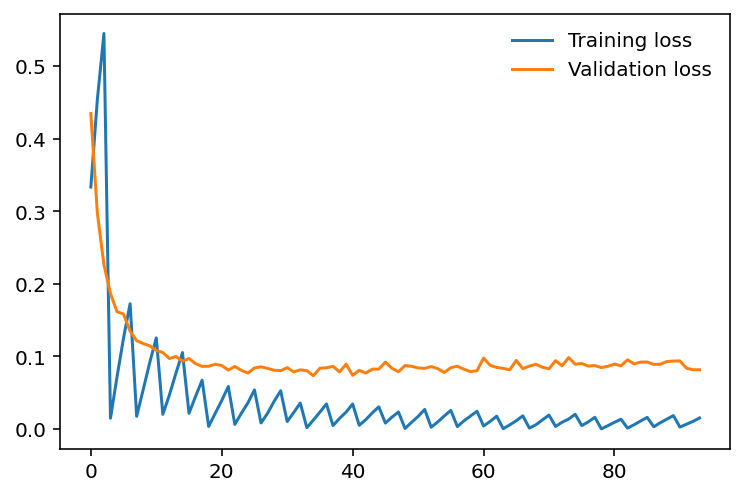

<Figure size 288x72 with 0 Axes>

In [32]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(1)

From the above graph, we are able to positively predict the answer of the second part of the question. **Find ways to explain how and why the model converges and at what point overfitting takes place?** 


*   Answer: The Validation Loss curve **(yellow)** starts increasing from the point somewhere around 27 issh based on the scaling of the curve. This shows that the neural network is overfitting from that point. This means that the average loss function of the validation data is increasing with more test data. This is what we call **overfitting**. The neural network now isnt able to identify the test data because it is too inclined to identifying the training data. This can be also shown for different variants of the chosen hidden layers. We can also be telling that the given neural network can be considered to be overfitting from the point where the "gap" between the training loss and test loss starts to increase. Because, as there is more and more training data fed into the network... the loss decreases but for the same amount of test data the loss has started to increase which means that the neural network is getting more inclined to just identifying the test data. 



In the code below, what matplotlib library will help us to do is create a bar like map which basically tells us the value of the label (of respected feature) but my predicting it. I have copied out this code again since I didnt know how to use matplotlib library that well. 

In [33]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

Creating the final prediction of the neural network. Again, this framework of the code was taken from a website... but was edited by the need of my code. 

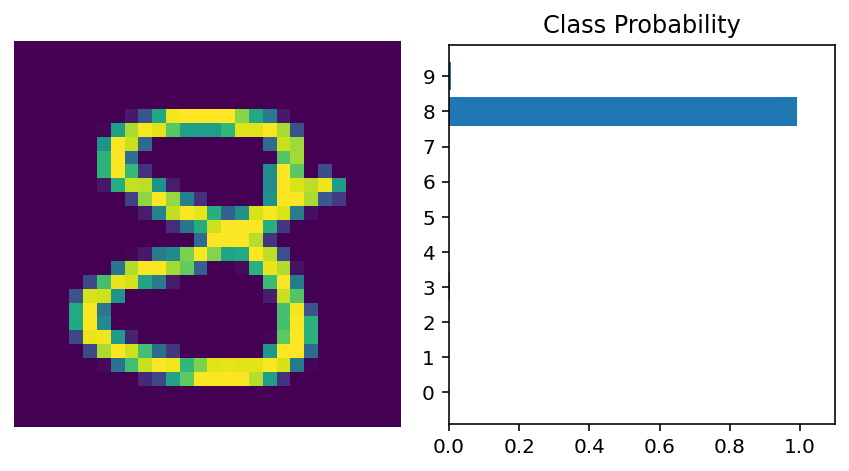

In [34]:

%matplotlib inline
def make_prediction(data):
    images, labels = next(iter(data))

    img = images[69].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    view_classify(img.view(1, 28, 28), ps)
make_prediction(test_loader)

In [35]:
final_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
final_test.rename(columns = {0:'label'}, inplace = True) 

In [38]:
final_test

,label,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Finally creating a similar kind of label/features structure of the final_test dataset. 

In [50]:
label_finaltest = final_test.label.values
features_finaltest = final_test.loc[:, final_test.columns != 'label'].values/255
print(features_finaltest.shape)

(10000, 784)


Converting it into a tensor...

In [41]:
features_tensor_final = torch.from_numpy(features_finaltest)
label_tensor_final = torch.from_numpy(label_finaltest)

In [42]:
submission_tn_data = torch.utils.data.TensorDataset(features_tensor_final, label_tensor_final)

submission_loader = torch.utils.data.DataLoader(submission_tn_data, batch_size = batch_size, shuffle = True)


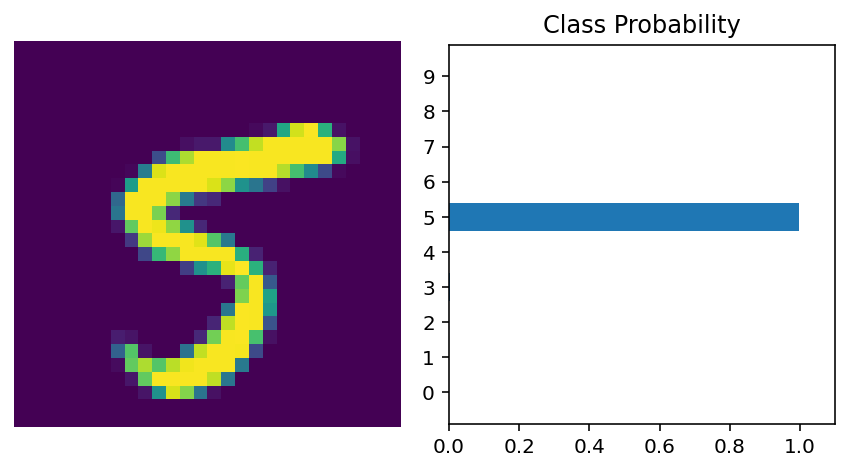

In [49]:
make_prediction(submission_loader)

The different approaches that I took towards making this neural networks were basically me tweaking some aspects of the code and observed how the accuracy will vary and also how the loss will vary.


1.   I changed the size of the nd arrays of the hidden layers.
2.   I changed the number of hidden layers.
3.   I also tried changing the learning rate values. 
     like increasing the learning rate value from 0.001 to 0.01 gave me a larger validation loss data because the cost function mightve just gotten stuck in a local maxima. 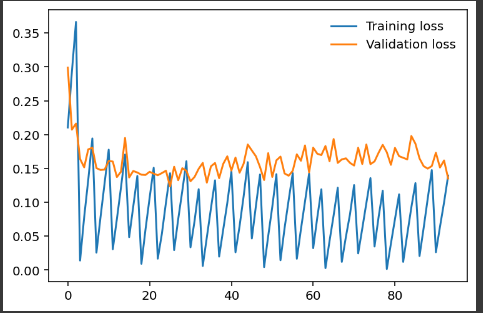 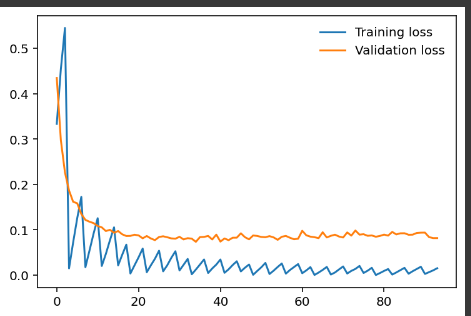

